PART 1

In [ ]:
!pip install clean-text
!pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=b820fcaa7fe39638ae98b08db9e9a64cdd13d7eea180ebfb376ee656ca28ec5f
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('news_sample.csv')
# define regular expressions for cleaning
num_re = re.compile(r"\d+")
# Formatting dates with YYYY-MM-DD since that's how it's formatted in the columns of the data.
date_re = re.compile(r"\d{4}-\d{2}-\d{2}")
email_re = re.compile(r"\S+@\S+")
url_re = re.compile(r"https?://\S+")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenlist = []
stopwordlist = []
stemmedlist = []
vocabulary_size = []
filtered_vocabulary_size = []
stemmed_vocabulary_size = []
def clean_text(text):
    # lower case all words
    text = text.lower()
    # replace multiple white spaces, tabs, or new lines with a single space
    text = re.sub(r"\s+", " ", text)
    # replace numbers, dates, emails, and URLs with special tokens
    text = date_re.sub("<DATE>", text)
    text = email_re.sub("<EMAIL>", text)
    text = url_re.sub("<URL>", text)
    text = num_re.sub("<NUM>", text)
    tokens = word_tokenize(text)
    # Removing tokens that come from tags
    tags = ['<','>','num','date','email','url']
    filtered_tokens = []
    for token in tokens:
        if token.lower() not in tags and re.match(r'^\w', token):
            filtered_tokens.append(token)
    # Removing stopwords
    tokenlist.append(filtered_tokens)
    stopwordless_tokens = []
    for token in filtered_tokens:
        if token.lower() not in stop_words:
            stopwordless_tokens.append(token)
    stopwordlist.append(stopwordless_tokens)
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwordless_tokens]
    stemmedlist.append(stemmed_tokens)
    # Compute vocabulary size before and after removing stopwords and stemming
    vocabulary_size.append(len(set(filtered_tokens)))
    filtered_vocabulary_size.append(len(set(stopwordless_tokens)))
    stemmed_vocabulary_size.append(len(set(stemmed_tokens)))
    stemmedtext = ' '.join(stemmed_tokens)
    return (stemmedtext)


df['content'] = df['content'].apply(clean_text)
vocab_sum = sum(vocabulary_size)
filtered_sum= sum(filtered_vocabulary_size)
stemmed_sum = sum(stemmed_vocabulary_size)
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)

print(df)


Vocabulary size: 72230
Vocabulary size without stopwords: 59307 , resulting in reduction rate: 0.8210854215699848
Vocabulary size after stemming with no stopwords: 53917 , resulting in reduction rate: 0.9091169676429427
     Unnamed: 0     id                domain        type  \
0             0    141               awm.com  unreliable   
1             1    256     beforeitsnews.com        fake   
2             2    700           cnnnext.com  unreliable   
3             3    768               awm.com  unreliable   
4             4    791  bipartisanreport.com   clickbait   
..          ...    ...                   ...         ...   
245         245  39259     beforeitsnews.com        fake   
246         246  39468     beforeitsnews.com        fake   
247         247  39477       www.newsmax.com         NaN   
248         248  39550       www.newsmax.com         NaN   
249         249  39558       www.newsmax.com         NaN   

                                                   url  \
0

PART 1.1

PART 1.2


Observations: 

  1.All articles from www.newsmax.com, willyloman.wordpress and wallstreetonparade.com do not have a type.

2. The ids go up with the article order

3. The average amount of stemmed words change with each type, this is however a small sample size for a lot of the types.

4. The count of types vary a lot, 62% are "fake", yet only 1/250 is "clickbait" or "hate".

5. The words a more evenly spread without stopwords (see graphs below)


C:\Users\welin\AppData\Local\Temp\ipykernel_8736\3680508902.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


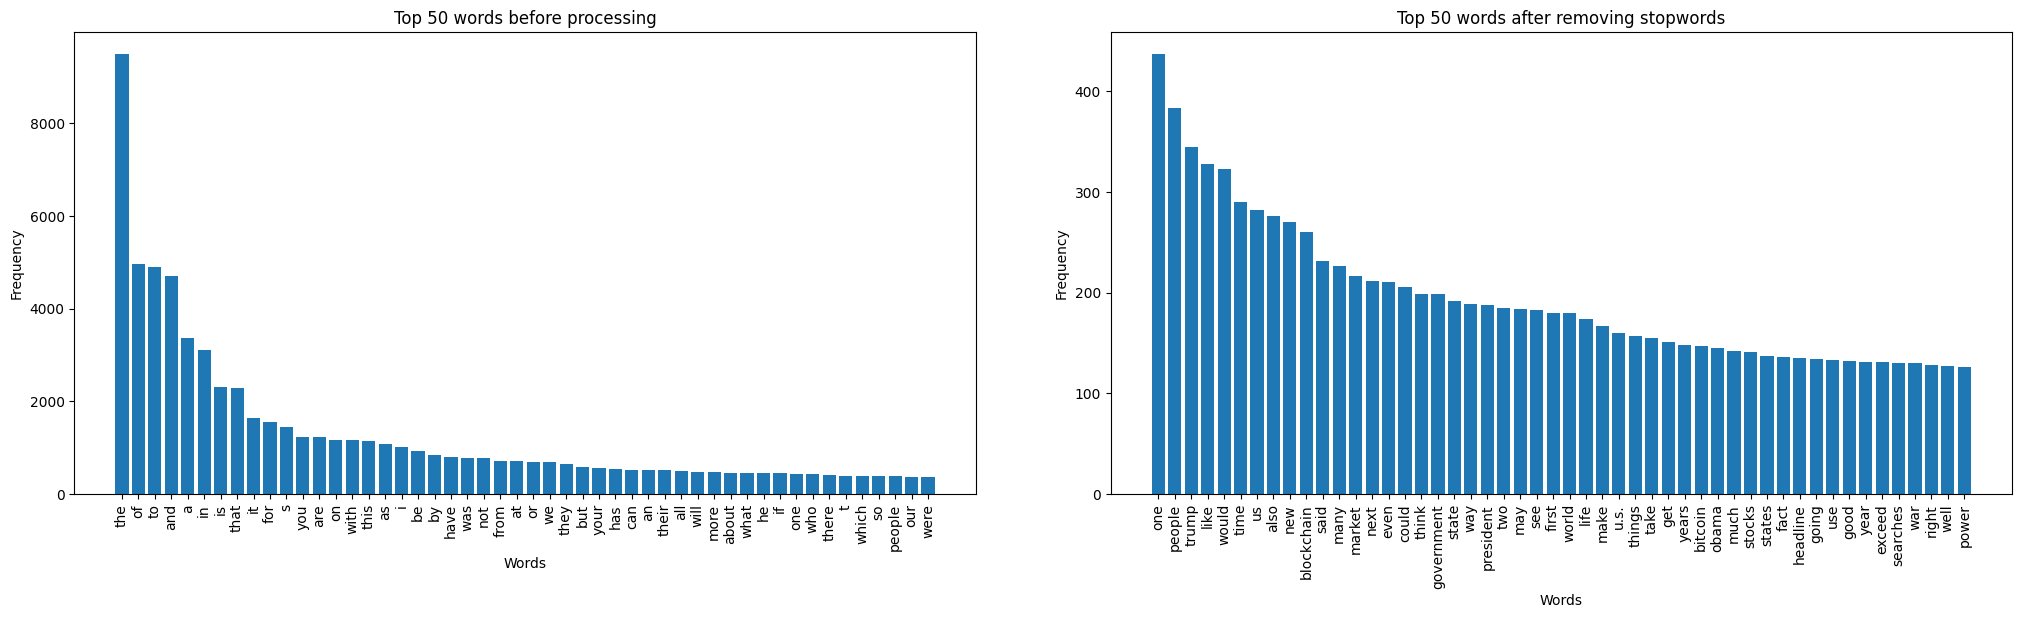

In [19]:

from collections import Counter
import matplotlib.pyplot as plt
# Use Counter to count the frequency of each word
word_counts = Counter(sum(tokenlist, []))

# Get the 50 most common words
top_words = word_counts.most_common(50)

# Separate out the words and their counts
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

import matplotlib.pyplot as plt
from collections import Counter

# Create the first subplot
plt.subplots(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.title('Top 50 words before processing')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)

# Create the second subplot
word_counts = Counter(sum(stopwordlist, []))
top_words = word_counts.most_common(50)
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

plt.subplot(1, 2, 2)
plt.title('Top 50 words after removing stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)

# Show the figure
plt.subplots_adjust(wspace=0.15) # adjust the width space between subplots
plt.show()

In [ ]:
import pandas as pd

# Set the file path
file_path = 'news_cleaned_2018_02_13.csv'

# Determine the number of rows to skip based on the 10% sampling rate
num_rows = sum(1 for line in open(file_path, encoding='utf-8')) // 10

# Load the data, skipping every 10th row
dff = pd.read_csv(file_path, skiprows=lambda i: i % 10 != 0, encoding='utf-8')


PART 1.3

In [ ]:

# define regular expressions for cleaning
num_re = re.compile(r"\d+")
# Formatting dates with YYYY-MM-DD since that's how it's formatted in the columns of the data.
date_re = re.compile(r"\d{4}-\d{2}-\d{2}")
email_re = re.compile(r"\S+@\S+")
url_re = re.compile(r"https?://\S+")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenlist = []
stopwordlist = []
stemmedlist = []
vocabulary_size = []
filtered_vocabulary_size = []
stemmed_vocabulary_size = []
def clean_text(text):
    # lower case all words
    text = text.lower()
    # replace multiple white spaces, tabs, or new lines with a single space
    text = re.sub(r"\s+", " ", text)
    # replace numbers, dates, emails, and URLs with special tokens
    text = date_re.sub("<DATE>", text)
    text = email_re.sub("<EMAIL>", text)
    text = url_re.sub("<URL>", text)
    text = num_re.sub("<NUM>", text)
    tokens = word_tokenize(text)
    # Removing tokens that come from tags
    tags = ['<','>','num','date','email','url']
    filtered_tokens = []
    for token in tokens:
        if token.lower() not in tags and re.match(r'^\w', token):
            filtered_tokens.append(token)
    # Removing stopwords
    tokenlist.append(filtered_tokens)
    stopwordless_tokens = []
    for token in filtered_tokens:
        if token.lower() not in stop_words:
            stopwordless_tokens.append(token)
    stopwordlist.append(stopwordless_tokens)
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwordless_tokens]
    stemmedlist.append(stemmed_tokens)
    # Compute vocabulary size before and after removing stopwords and stemming
    vocabulary_size.append(len(set(filtered_tokens)))
    filtered_vocabulary_size.append(len(set(stopwordless_tokens)))
    stemmed_vocabulary_size.append(len(set(stemmed_tokens)))
    stemmedtext = ' '.join(stemmed_tokens)
    return (stemmedtext)

dff = dff.loc[dff['content'].apply(lambda x: not isinstance(x, float))]
dff['content'] = dff['content'].apply(clean_text)
vocab_sum = sum(vocabulary_size)
filtered_sum= sum(filtered_vocabulary_size)
stemmed_sum = sum(stemmed_vocabulary_size)
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)

print(dff)


In [ ]:
#Making a new copy so I dont have to load data each time I want it fresh

df = dff.copy()
print(dff.size)

NameError: ignored

In [ ]:

unique_values = df['type'].unique()

# print the unique values
print(unique_values)


['rumor' 'hate' 'unreliable' 'conspiracy' 'clickbait' 'satire' 'fake'
 'reliable' 'bias' 'political' 'junksci' nan 'unknown']


Fake :  rumor, hate, unreliable, conspicary, clickbait, satire, fake, bias, junksci
True: Reliable, Politcal

In [ ]:
# create a dictionary to map the values to "fake" or "true"
mapping = {'rumor': 'fake',
           'hate': 'fake',
           'unreliable': 'fake',
           'conspiracy': 'fake',
           'clickbait': 'fake',
           'satire': 'fake',
           'bias': 'fake',
           'junksci': 'fake',
           'political': 'reliable'}

# replace the values using the mapping dictionary
df['type'] = df['type'].replace(mapping)
# filter out the rows where 'Column1' is not equal to either "true" or "fake"
df = df[(df['type'] == 'reliable') | (df['type'] == 'fake')]

In [ ]:

unique_values = df['type'].unique()

# print the unique values
print(unique_values)

['fake' 'reliable']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create a CountVectorizer object to transform the documents into a bag of words representation
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix of word counts
wordvector = vectorizer.fit_transform(df['content'])

# Print the vocabulary of the vectorizer (the unique words in the corpus)
print(vectorizer.vocabulary_)

X_train, X_test, y_train, y_test = train_test_split(wordvector, df['type'], test_size=0.2)

# Train a logistic regression classifier on the training data
clf = LogisticRegression()

clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

{'life': 72570, 'illu': 59557, 'least': 71403, 'quantum': 102833, 'level': 72115, 'theori': 126728, 'recent': 104831, 'confirm': 25645, 'set': 113784, 'research': 106486, 'final': 43836, 'mean': 78784, 'test': 126005, 'john': 64724, 'wheeler': 139385, 'delayed': 31305, 'cho': 22438, 'conclud': 25473, 'physicist': 96837, 'right': 107505, 'mr': 83627, 'propo': 101105, 'experi': 41473, 'involv': 62220, 'move': 83497, 'object': 89741, 'given': 49608, 'choic': 22466, 'act': 1221, 'like': 72756, 'wave': 138382, 'particl': 94346, 'former': 45439, 'vibrat': 136060, 'frequenc': 46189, 'distinguish': 34099, 'latter': 70919, 'determin': 32464, 'posit': 99073, 'space': 118730, 'unlik': 133196, 'point': 98283, 'decid': 30755, 'one': 91031, 'time': 127786, 'technolog': 125215, 'avail': 8953, 'conduct': 25569, 'strong': 121481, 'scientist': 112173, 'abl': 516, 'carri': 19763, 'unfortun': 132847, 'yet': 142459, 'attack': 8434, 'islam': 62742, 'terrorism': 125940, 'connect': 25807, 'know': 68428, 'seve

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create a CountVectorizer object to transform the documents into a bag of words representation
vectorizer = CountVectorizer()
# Create a new column in the dataframe for the domain information
#df['domain_info'] = df['domain'].astype(str)

# Concatenate the domain information with the content of each document
df['content'] = df['domain'] + df['content']
# Fit the vectorizer to the documents and transform them into a matrix of word counts
wordvector = vectorizer.fit_transform(df['content'])

# Print the vocabulary of the vectorizer (the unique words in the corpus)
print(vectorizer.vocabulary_)

X_train, X_test, y_train, y_test = train_test_split(wordvector, df['type'], test_size=0.2)

# Train a logistic regression classifier on the training data
clf = LogisticRegression()

clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

['fake' 'fake' 'reliable' ... 'fake' 'fake' 'reliable']


Try to see if other features are useful